#### Install Libraries

In [2]:
! pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached h5py-3.10.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.2 kB ? eta -:--:--
     ------------------------- ------------ 30.7/46.2 kB 435.7 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/46.2 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 230.6 kB/s eta 0:00:00
  Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl.metadata (34 kB)
  Using cached urllib3-2.2.1-py3-

In [5]:
! pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 682.7 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.6 kB 435.7 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.6 kB 435.7 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 196.9 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 233.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.3 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 78.3/78.3 kB 1.1 MB/s eta 0:00:00


In [12]:
! pip install scikit-image

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 229.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.5 MB 660.6 kB/s eta 0:00:38
   ---------------------------------------- 0.1/24.5 MB 787.7 kB/s eta 0:00:32
   ---------------------------------------- 0.1/24.5 MB 880.9 kB/s eta 0:00:28
   ---------------------------------------- 0.1/24.5 MB 880.9 kB/s eta 0:00:28
   ---------------------------------------- 0.1/24.5 MB 504.4 kB/s eta 0:00:49
   ---------------------------------------- 0.2/24.5 MB 737.3 kB/s eta

In [7]:
! pip install matplotlib

     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.6 kB ? eta -:--:--
     ------ ------------------------------ 30.7/162.6 kB 660.6 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/162.6 kB 660.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/162.6 kB 196.9 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/162.6 kB 374.1 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.6 kB 435.7 kB/s eta 0:00:01
     --------------------------- -------- 122.9/162.6 kB 359.9 kB/s eta 0:00:01
     ---------------------------------- - 153.6/162.6 kB 416.7 kB/s eta 0:00:01
     ------------------------------------ 162.6/162.6 kB 423.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.6 MB 2.2 MB/s eta 0:00:04
    --------------------------------------- 0.2/7.6 MB 2.4 MB/s eta 

# Algorithm

In [45]:
import tensorflow as tf

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [46]:
# Input Data

import os  # to walk through the folders
import numpy as np

TRAIN_PATH = "C:/Users/nraji/Machine Learning/Deep Learning/UNet/nuclei/data-science-bowl-2018/stage1_train/"
TEST_PATH =  "C:/Users/nraji/Machine Learning/Deep Learning/UNet/nuclei/data-science-bowl-2018/stage1_test/"

train_ids = next(os.walk(TRAIN_PATH))[1]      #list of names of subfolders in TRAIN_PATH.
test_ids = next(os.walk(TEST_PATH))[1]        #list of names of subfolders in TEST_PATH.
# with [1] = data type is 'list' (We need a list)
# without [1] = data type is 'tuple' 

#Create an empty array that has all zeros. Size = Our input layer image size.
#Then as I read each image I'm gonna update this with the new numbers.
X_train = np.zeros((len(train_ids), IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS), dtype=np.uint8) # Create a array with zeros for images. (length,128,128,3)
Y_train = np.zeros((len(train_ids), IMG_WIDTH, IMG_HEIGHT, 1), dtype=bool)            # Create a array with zeros for masks. (length,128,128,1)

### Enumerate
enumerate(train_ids): This function takes an iterable (in this case, the train_ids list) and returns an iterator that produces tuples containing the index of each element and the element itself. For example, if train_ids is ['id1', 'id2', 'id3'], enumerate(train_ids) will yield (0, 'id1'), (1, 'id2'), and (2, 'id3').

This line of code iterates over each element in the train_ids list using the enumerate() function, which provides both the index (n) and the value (id_) of each element. 

Additionally, it utilizes tqdm to display a progress bar to track the iteration progress.


### tqdm():
tqdm is a fast, extensible progress bar for loops and pipelines in Python. It can be used to wrap any iterable to provide a progress bar during iteration.

1. iterable: The iterable object to wrap with the progress bar.
2. total (optional): The total number of iterations. If specified, it allows tqdm to calculate the percentage of completion.

In [48]:
# Resizing training images and masks.

from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize


print('Resizing training images and masks...')

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    #[:,:,:IMG_CHANNELS]: This part slices the image array to select specific channels. 
    #It selects the first IMG_CHANNELS channels of the image array. 

    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    #It then resizes the image to the specified dimensions (IMG_HEIGHT x IMG_WIDTH) using the resize() function from skimage.transform. 
    #The preserve_range=True argument ensures that pixel values are preserved during resizing.

    X_train[n] = img  #Fill empty X_train with values from img

    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)

        mask_1 = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  preserve_range=True), axis=-1)
        # After resizing the mask image, np.expand_dims() function from NumPy is used to add an extra dimension to the mask array. 
        # This is achieved by specifying axis=-1, which adds a new dimension at the end of the array. 
        # This extra dimension is added because the U-Net architecture typically expects input masks to have shape (height, width, channels), 
        #where channels represents the number of classes or objects to be segmented. 
        # By adding an extra dimension, the shape becomes (height, width, 1), indicating that there is only one class in the mask (binary segmentation). 
        # This is necessary to match the expected input shape of the U-Net model.

        mask = np.maximum(mask, mask_1)  
            
    Y_train[n] = mask

Resizing training images and masks...


100%|██████████| 670/670 [05:33<00:00,  2.01it/s]


In [49]:
# Resizing test images.

X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

sizes_test = []              #This list will store the original sizes of the test images before resizing.

print('Resizing test images...') 

for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Resizing test images...


100%|██████████| 65/65 [00:01<00:00, 51.73it/s]

Done!


1. np.squeeze() is a NumPy function used to remove single-dimensional entries from the shape of an array. It squeezes out dimensions of size 1.
2. This operation is performed to ensure that the ground truth mask has a suitable shape for visualization. Some image processing or machine learning operations may add extra dimensions to arrays, and squeezing ensures that these dimensions do not interfere with the visualization process.

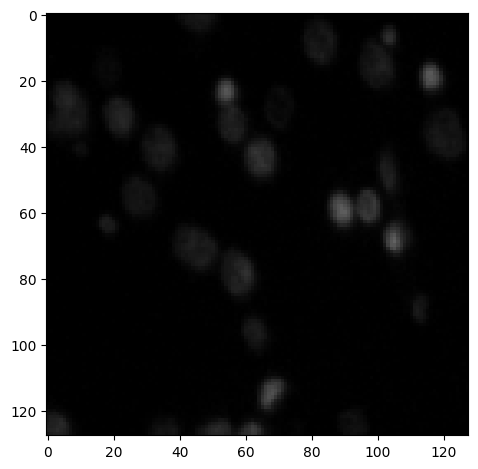

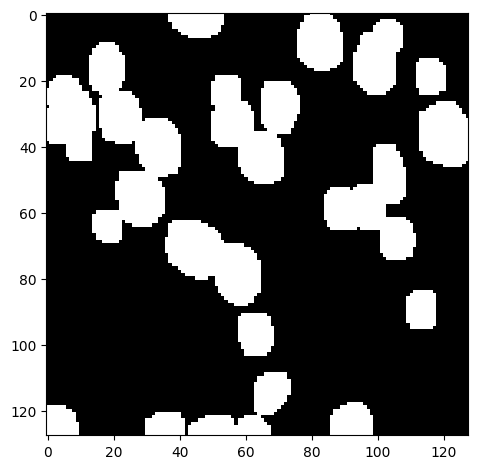

In [50]:
import random
import matplotlib.pyplot as plt

# The seed value is a starting point for the sequence of random numbers generated by the random number generator. 
# Setting a specific seed ensures that the sequence of random numbers generated is reproducible, meaning that the same sequence of random numbers will be generated each time the code is run with the same seed.
seed = 42
np.random.seed = seed

image_x = random.randint(0, len(train_ids)) # Generates a random integer between 0 and the length of the train_ids list. 
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [51]:
# Build the model.

inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x : x/255)(inputs)

c1 = tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c1)

p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
c2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c2)

p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
c3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c3)

p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
c4 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c4)

p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
c5 = tf.keras.layers.Conv2D(256, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c5)

# Expansive Path

u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides = (2,2), padding = "same")(c5)
u6 = tf.keras.layers.Concatenate()([u6,c4])
c6 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides = (2,2), padding = "same")(c6)
u7 = tf.keras.layers.Concatenate()([u7,c3])
c7 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides = (2,2), padding = "same")(c7)
u8 = tf.keras.layers.Concatenate()([u8,c2])
c8 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides = (2,2), padding = "same")(c8)
u9 = tf.keras.layers.Concatenate()([u9,c1])
c9 = tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1,1), activation = 'sigmoid')(c9)

model = tf.keras.Model(inputs = [inputs], outputs = [outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 128, 128,  │          0 │ input_layer_3[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 128, 128,  │        448 │ lambda_3[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 128, 128,  │          0 │ conv2d_57[0][0]   │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 128, 128,  │      2,320 │ dropout_27[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 64, 64,    │          0 │ conv2d_58[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 64, 64,    │      4,640 │ max_pooling2d_12… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 64, 64,    │          0 │ conv2d_59[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 64, 64,    │      9,248 │ dropout_28[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 32, 32,    │          0 │ conv2d_60[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_13… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 32, 32,    │          0 │ conv2d_61[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 32, 32,    │     36,928 │ dropout_29[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 16, 16,    │          0 │ conv2d_62[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_14… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 16, 16,    │          0 │ conv2d_63[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 16, 16,    │    147,584 │ dropout_30[0][0]

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

## **Callbacks**
### Checkpointer
This callback saves the model's weights during training. It can save either the model weights at certain intervals or only the weights that improve on the performance metric monitored.
1.   filepath: path to save the model file.
2.   monitor: Quantity to monitor. Typically 'val_loss' or 'val_accuracy'.
3.   save_best_only: If set to True, only the latest best model according to the monitored quantity will be saved. If False, the model weights will be saved at every checkpoint, regardless of whether they improve on the monitored metric.
4.   verbose: Verbosity mode. 1 means progress information will be displayed during saving.

### Early Stopping
The EarlyStopping callback in TensorFlow is used to stop training when a monitored quantity has stopped improving. This is particularly useful to prevent overfitting by stopping training once the model's performance on a validation set starts to degrade.
1.   monitor: Quantity to monitor. Typically 'val_loss' or 'val_accuracy'.
2.   patience:  Number of epochs with no improvement after which training will be stopped. If the monitored quantity does not improve for this number of epochs, training will stop.
3.   verbose: Verbosity mode. 0 or 1.

### CSVLogger
The CSVLogger callback in TensorFlow is used to stream epoch results to a CSV (Comma Separated Values) file. This allows you to track and analyze various training metrics over epochs using tools such as spreadsheets or data analysis libraries.
1. filename: Filename of the CSV file.
2. separator: String used to separate elements in the CSV file.
3. append: If True, the CSV file will be appended to instead of overwritten.

### Tensor Board
The TensorBoard callback in TensorFlow is used to write log files for TensorBoard, which is a visualization tool provided by TensorFlow. TensorBoard allows you to visualize dynamic graphs of your training and test metrics, as well as activation histograms for the different layers in your model. It provides a powerful interface for monitoring and debugging your neural network model during training.
1. log_dir: Directory where the log files will be stored.
2. histogram_freq: Frequency (in epochs) at which to compute activation histograms for the layers of the model. If set to 0, histograms won't be computed. If set to a positive integer, activation histograms will be computed every histogram_freq epochs during training.

In [52]:
# Callbacks

checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.keras', verbose=1, save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)
log_csv = tf.keras.callbacks.CSVLogger('my_logs.csv', separator=',', append=False)
tensor_board = tf.keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=1)

callbacks = [checkpointer, early_stopping, log_csv, tensor_board]

# Training the Model

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks = callbacks)   
# It may stop training before 25 epochs due to early stopping callback


Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.7312 - loss: 0.6481
Epoch 1: val_loss improved from inf to 0.37430, saving model to model_for_nuclei.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 881ms/step - accuracy: 0.7317 - loss: 0.6465 - val_accuracy: 0.7993 - val_loss: 0.3743
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.8231 - loss: 0.3646
Epoch 2: val_loss improved from 0.37430 to 0.19129, saving model to model_for_nuclei.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 708ms/step - accuracy: 0.8241 - loss: 0.3633 - val_accuracy: 0.9239 - val_loss: 0.1913
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.9287 - loss: 0.1954
Epoch 3: val_loss improved from 0.19129 to 0.13376, saving model to model_for_nuclei.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 674ms/step - accuracy: 0.9288 - loss: 0.1951 - val_accuracy: 0.9431 - val_loss: 0.1338
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.9450 - loss: 0.1418
Epoch 4: val_loss improved from 0

1. ***preds_train = model.predict(X_train[ : int(X_train.shape[0]\*0.9)], verbose=1)***
      * Here, predictions are made on a subset of the training data (X_train) using the trained model (model). The subset includes the first 90% of the training data. The resulting predictions are stored in preds_train.

2. ***preds_train_t = (preds_train > 0.5).astype(np.uint8)***
      * ***preds_train > 0.5***  :  This part of the code compares each element in the preds_train array (which contains prediction probabilities) with the threshold value 0.5. For each element, it returns True if the probability is greater than 0.5 and False otherwise. This creates a boolean array where True indicates a positive prediction (probability > 0.5) and False indicates a negative prediction (probability <= 0.5).

      * ***.astype(np.uint8)***  :  After applying the threshold, the resulting boolean array is converted to an array of unsigned 8-bit integers (np.uint8). This conversion changes True values to 1 and False values to 0, effectively converting the boolean array to a binary array.

In [53]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


Perform a sanity check on some random training samples


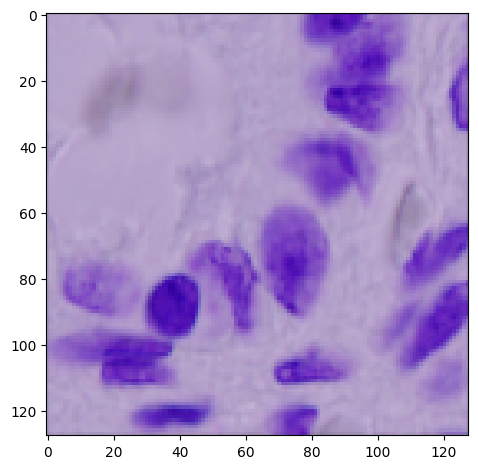

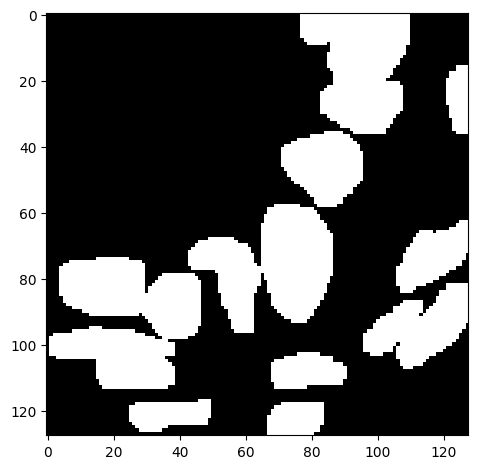

c:\Users\nraji\tfod\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


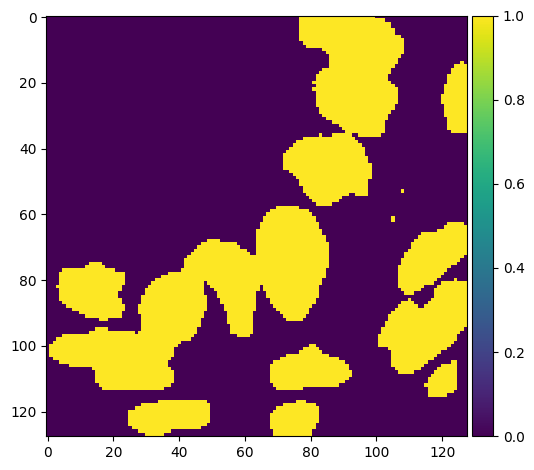

Perform a sanity check on some random validation samples


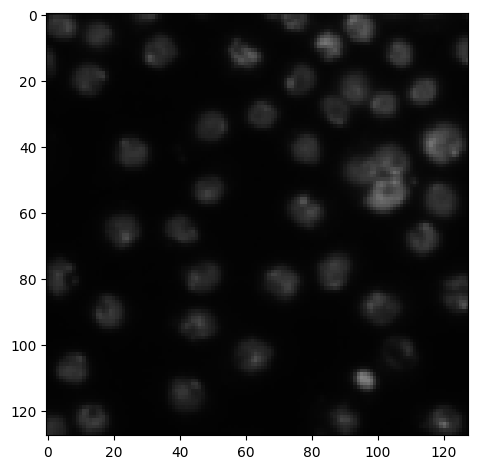

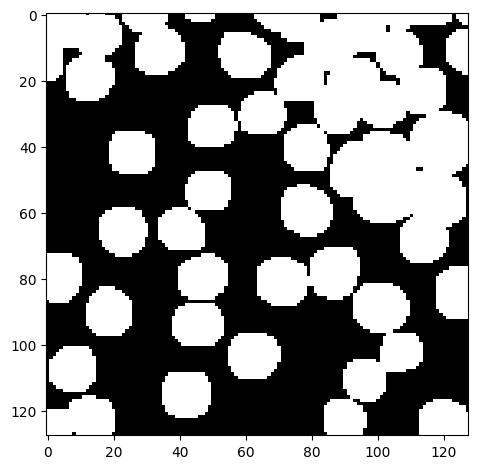

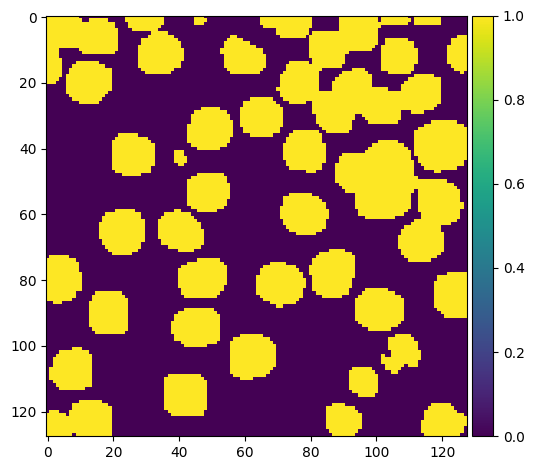

Perform a sanity check on some random testing samples


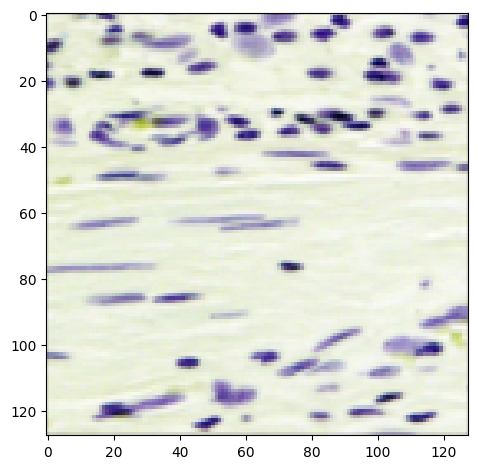

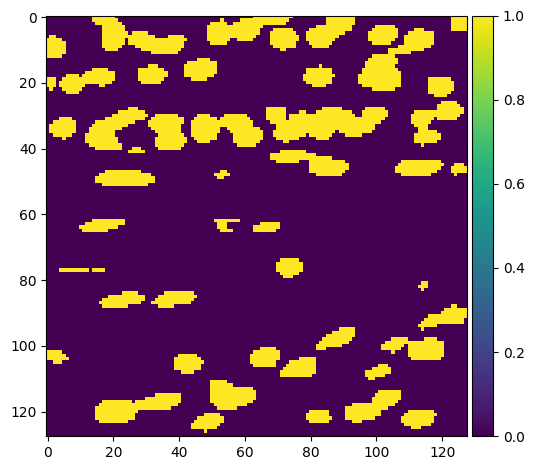

In [54]:
# Perform a sanity check on some random training samples

print("Perform a sanity check on some random training samples")

ix = random.randint(0, len(preds_train_t))

imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()


# Perform a sanity check on some random validation samples

print("Perform a sanity check on some random validation samples")

ix = random.randint(0, len(preds_val_t))

imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()


# Perform a sanity check on some random testing samples

print("Perform a sanity check on some random testing samples")

ix = random.randint(0, len(preds_test_t))

imshow(X_test[ix])
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()
